<a href="https://colab.research.google.com/github/OlegLaiok/CV/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_layok_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Предобработка изображений

1. Загрузка изображений

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/ru/thumb/2/24/Lenna.png/1200px-Lenna.png -O Lena.png

--2022-06-24 12:22:16--  https://upload.wikimedia.org/wikipedia/ru/thumb/2/24/Lenna.png/1200px-Lenna.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2354696 (2.2M) [image/png]
Saving to: ‘Lena.png’

Lena.png            100%[===================>]   2.25M  --.-KB/s    in 0.1s    

2022-06-24 12:22:16 (15.2 MB/s) - ‘Lena.png’ saved [2354696/2354696]



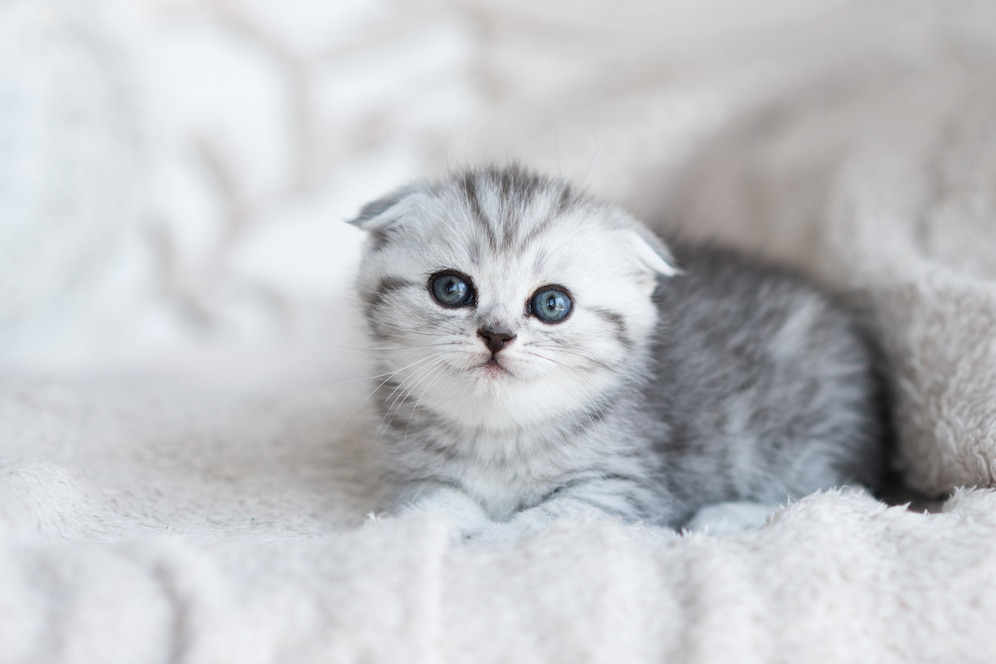

In [ ]:
img_pil = Image.open("/content/drive/MyDrive/ColabNotebooks/CV/kitten.jpg")
display(img_pil)

Как видим, изображение большое. Какой именно размер у изображения?


In [ ]:
img_pil.size

(996, 664)

В размерах изображения PIL не указано количество каналов<br>
Для работы с OpenCV изображение должно иметь тип numpy.ndarray

In [ ]:
img_np = np.array(img_pil)
img_np

array([[[222, 227, 231],
        [222, 227, 231],
        [222, 227, 231],
        ...,
        [189, 189, 189],
        [189, 189, 189],
        [189, 189, 189]],

       [[222, 227, 231],
        [222, 227, 231],
        [222, 227, 231],
        ...,
        [189, 189, 189],
        [189, 189, 189],
        [189, 189, 189]],

       [[222, 227, 231],
        [222, 227, 231],
        [222, 227, 231],
        ...,
        [190, 190, 190],
        [190, 190, 190],
        [190, 190, 190]],

       ...,

       [[220, 221, 226],
        [220, 221, 226],
        [220, 221, 226],
        ...,
        [222, 223, 227],
        [223, 224, 228],
        [223, 224, 228]],

       [[219, 220, 225],
        [219, 220, 225],
        [220, 221, 226],
        ...,
        [223, 224, 228],
        [223, 224, 228],
        [224, 225, 229]],

       [[219, 220, 225],
        [219, 220, 225],
        [219, 220, 225],
        ...,
        [223, 224, 228],
        [224, 225, 229],
        [224, 225, 229]]

In [ ]:
# размеры изображения в виде numpy-массива
img_np.shape

(664, 996, 3)

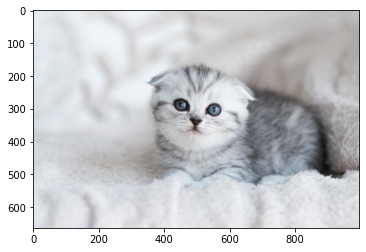

In [ ]:
plt.imshow(img_np)

Задание<br>
Напишите функцию для визуализации любого типа картинок

In [ ]:
def show_image(image):
  # ваш код здесь
  if isinstance(image, np.ndarray):
    print("This is OpenCV image!")
    plt.imshow(image)
    plt.show()
  elif isinstance(image, Image.Image):
    print("This is PIL Image!")
    display(image)
  else:
    raise TypeError("Wrong image type")

This is OpenCV image!


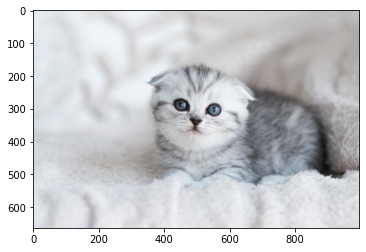

This is PIL Image!


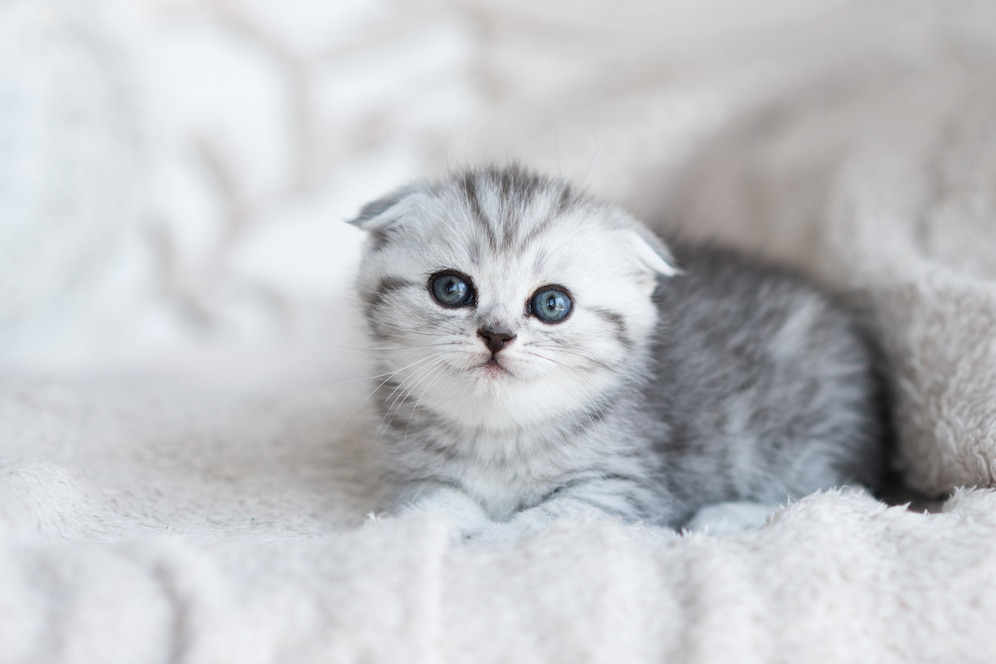

In [ ]:
show_image(img_np)
show_image(img_pil)

Теперь попробуем загрузить изображение с помощью OpenCV

In [ ]:
img_opencv = cv2.imread("/content/drive/MyDrive/ColabNotebooks/CV/kitten.jpg")

Что мы получим, когда визуализируем загруженную картинку?

This is OpenCV image!


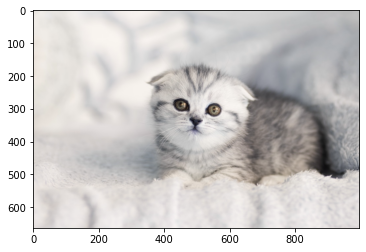

In [ ]:
show_image(img_opencv)

# Спойлер

OpenCV загружает и хранит картинки в виде BGR - Blue Green Red Channels

This is OpenCV image!


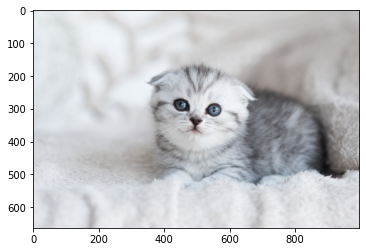

In [ ]:
img_opencv = cv2.cvtColor(img_opencv, cv2.COLOR_RGB2BGR)
show_image(img_opencv)

Как выглядят отдельные цветовые каналы?

This is OpenCV image!


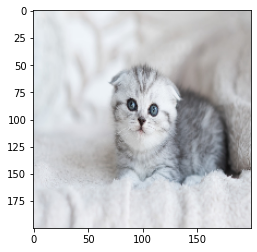

In [ ]:
img_opencv = cv2.resize(img_opencv, (200, 200))
show_image(img_opencv)

This is OpenCV image!


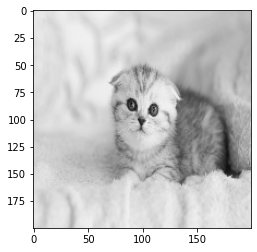

This is OpenCV image!


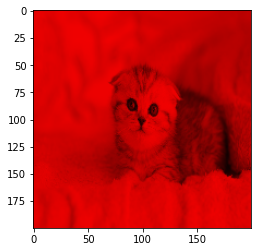

This is OpenCV image!


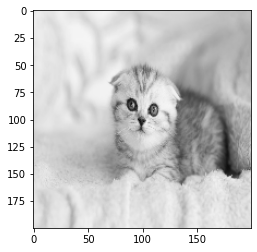

This is OpenCV image!


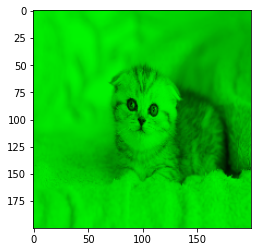

This is OpenCV image!


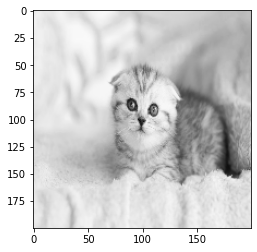

This is OpenCV image!


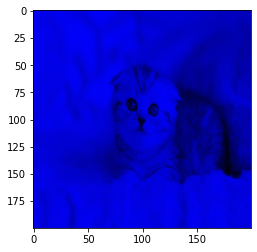

In [ ]:
#Изображения как есть
colors = img_opencv[:,:,0], img_opencv[:,:,1], img_opencv[:,:,2]
r, g, b = colors

show_image(np.dstack([r for _ in range(3)]))
show_image(np.dstack([r, np.ones(r.shape, dtype=np.uint8), np.ones(r.shape, dtype=np.uint8)]))

show_image(np.dstack([g for _ in range(3)]))
show_image(np.dstack([np.ones(r.shape, dtype=np.uint8), g, np.ones(r.shape, dtype=np.uint8)]))

show_image(np.dstack([b for _ in range(3)]))
show_image(np.dstack([np.ones(r.shape, dtype=np.uint8), np.ones(r.shape, dtype=np.uint8), b]))

Посложнее, но удобнее

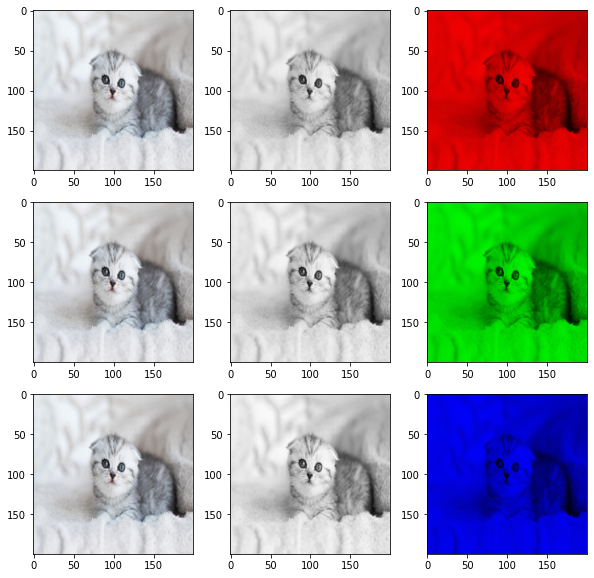

In [ ]:
fig, axs = plt.subplots(3, 3)
fig.set_figwidth(10)
fig.set_figheight(10)

for i in range(3):
  color = colors[i]
  axs[i,0].imshow(img_opencv)
  axs[i,1].imshow(np.dstack([color for _ in range(3)]))
  one_color = [np.ones(color.shape, dtype=np.uint8) for _ in range(3)]
  one_color[i] = color
  one_color = np.dstack(one_color)
  axs[i,2].imshow(one_color)

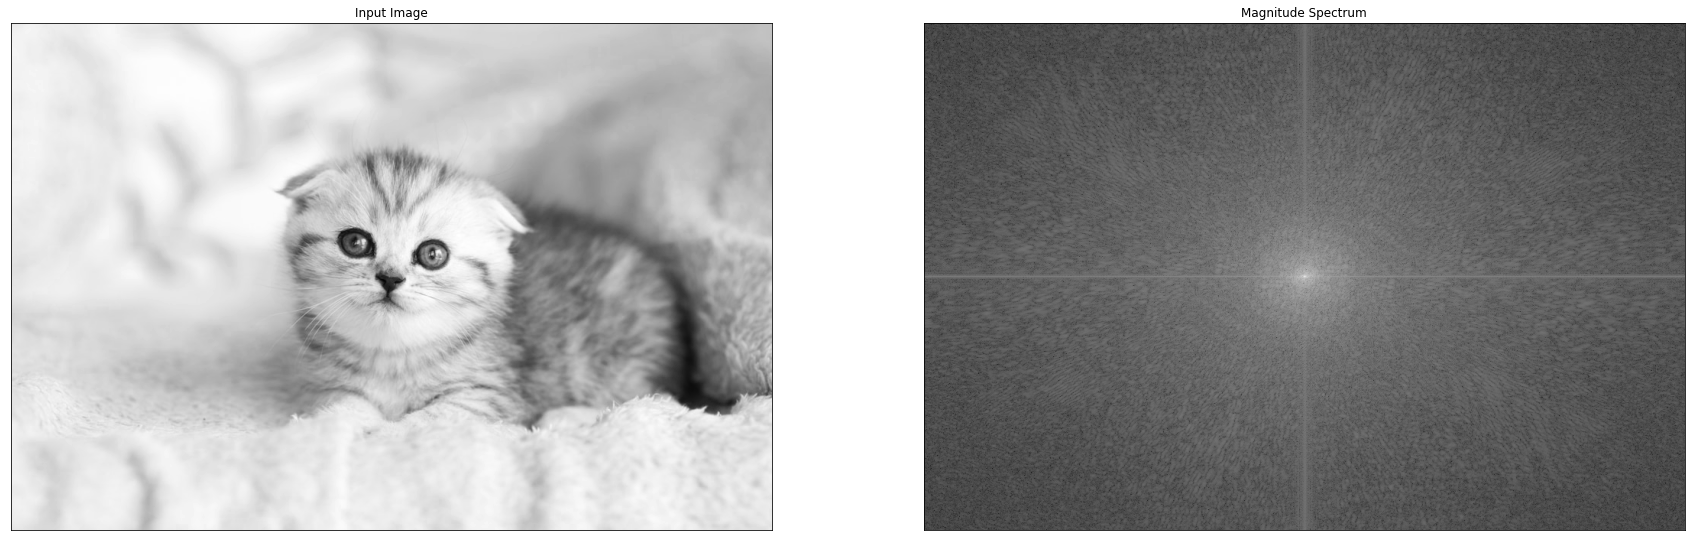

In [ ]:
single_ch_image = img_np[:,:,2]
f = np.fft.fft2(single_ch_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize=(30,30))
plt.subplot(121),plt.imshow(single_ch_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

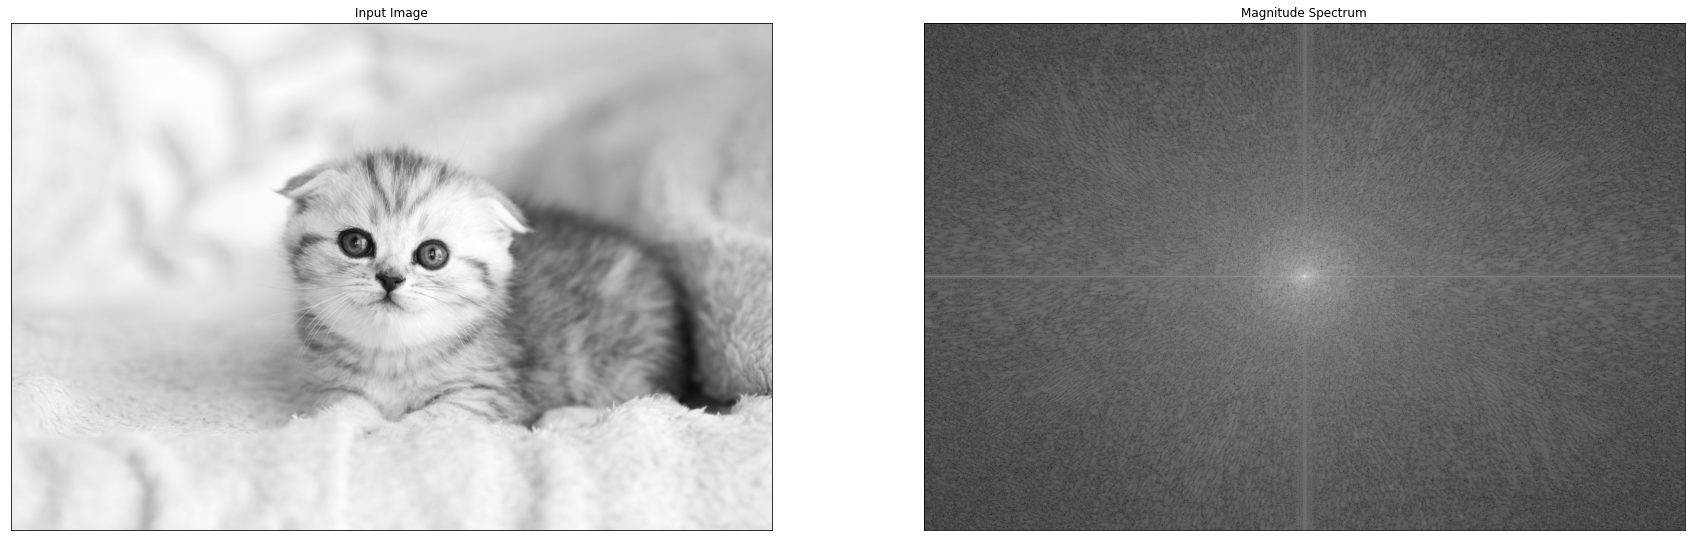

In [ ]:
single_ch_image = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
f = np.fft.fft2(single_ch_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize=(30,30))
plt.subplot(121),plt.imshow(single_ch_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()